### Load the dataset into the tool.

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# reading the data

Data = pd.read_csv('E:\Python\Mall_Customers.csv')
print(Data)
# getting the shape of the Data

Data.shape

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


(200, 5)

In [32]:
# looking at the head of the dataset?

Data.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
# describe the dataset?

Data.describe()



,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [33]:
# information of the dataset?

Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:

# checking if there is any NULL dataset?

Data.isnull().sum()



CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [35]:
# checking the columns of the dataset?

Data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Perform Below Visualizations.

∙ Univariate Analysis

∙ Bi- Variate Analysis

∙ Multi-Variate Analysis

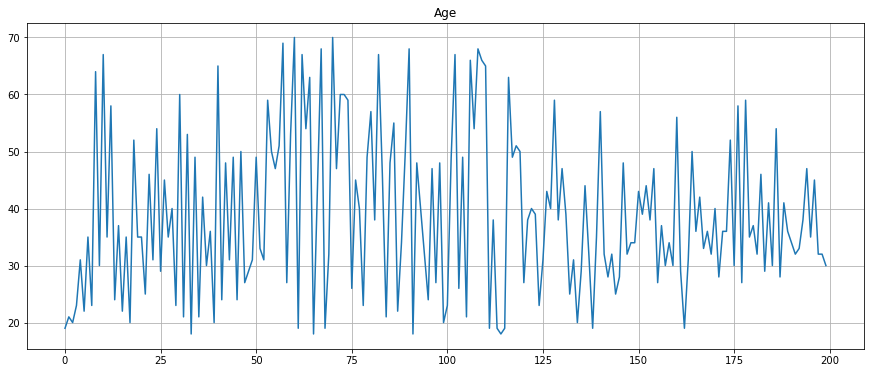

In [142]:
#Univarient
# pairplot

from matplotlib import rcParams
rcParams['figure.figsize'] =15,6
plt.plot(Data.Age)
plt.grid(True)
plt.title("Age");


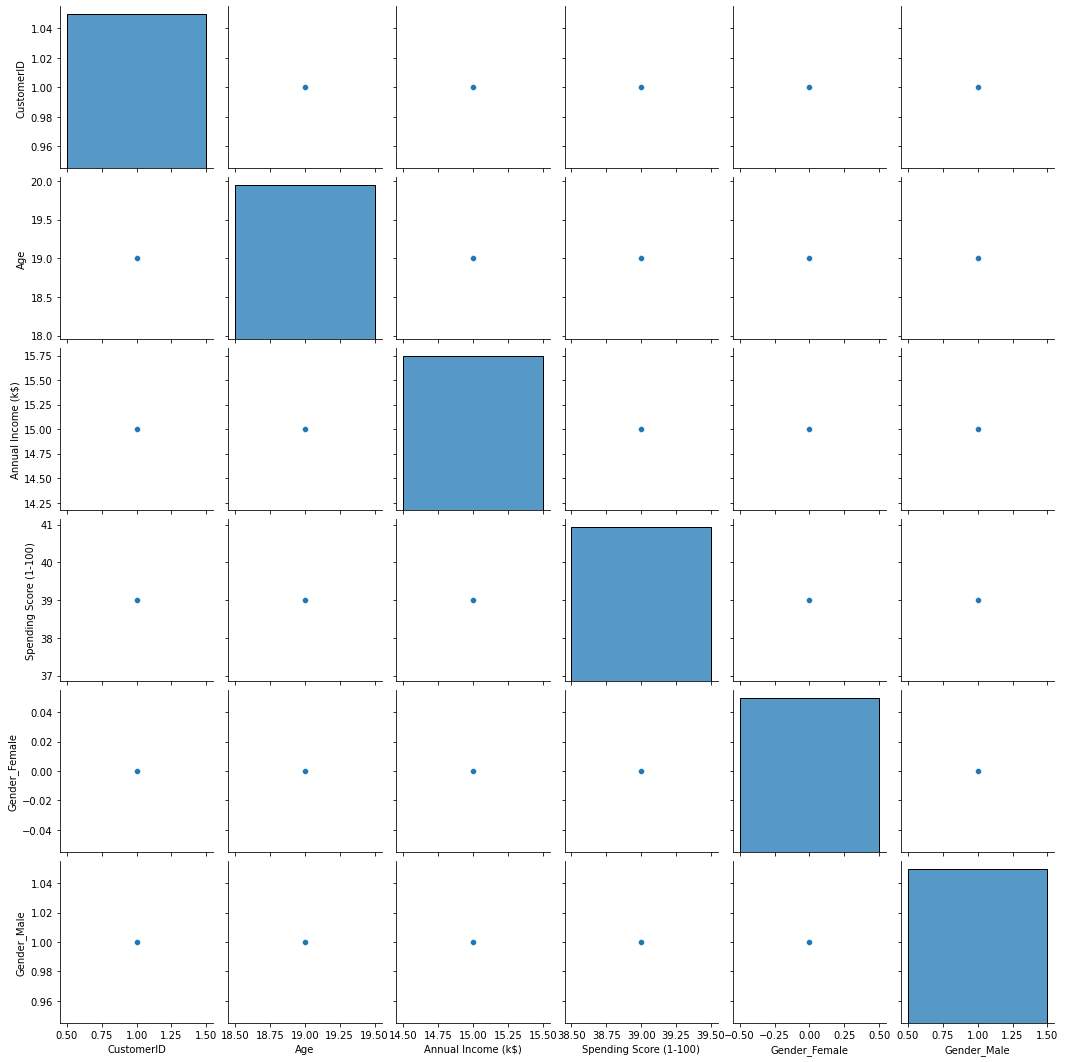

In [146]:
#Bivarient
# pairplot

sns.pairplot(Data[:1])

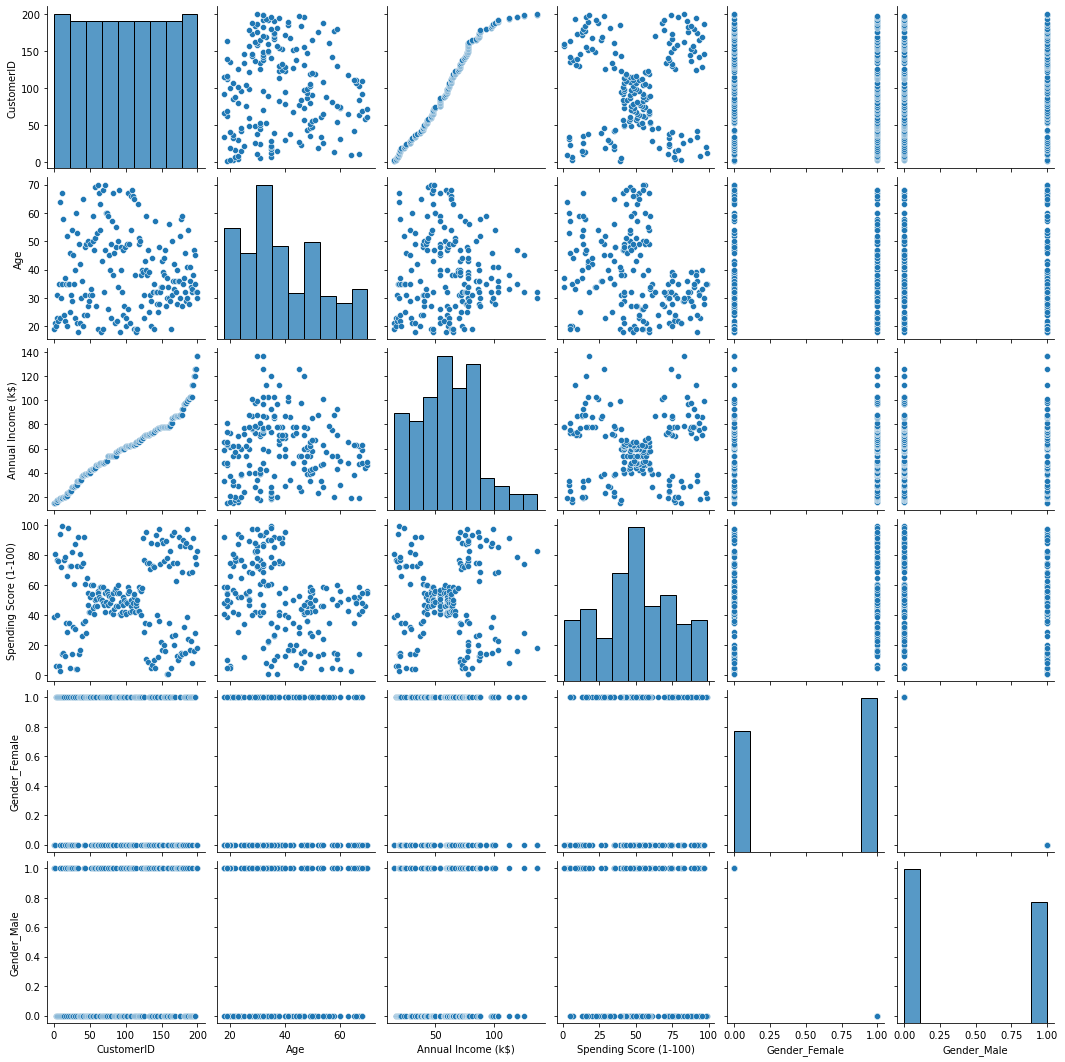

In [144]:
#mutivarient
# pairplot

sns.pairplot(Data);

In [50]:
from math import pi

# Set data
Df = pd.DataFrame({
'group': [i for i in range(0, 200)],
'CustomerID': Data['CustomerID'],
'Gender': Data['Gender'],
'Age': Data['Age'],
'Annual Income (k$)':  Data['Annual Income (k$)'],
'Spending Score (1-100)': Data['Spending Score (1-100)']
})

In [51]:
# number of variable

categories=list(Df)[1:]
N = len(categories)

In [52]:
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = Df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values

[1, 'Male', 19, 15, 39, 1]

In [54]:
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

([<matplotlib.projections.polar.ThetaTick at 0x1bd21a9bbe0>,
 [Text(0.0, 0, 'CustomerID'),
  Text(1.2566370614359172, 0, 'Gender'),
  Text(2.5132741228718345, 0, 'Age'),
  Text(3.7699111843077517, 0, 'Annual Income (k$)'),
  Text(5.026548245743669, 0, 'Spending Score (1-100)')])

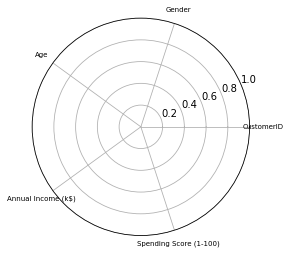

In [64]:
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='Black', size=7)


(0.0, 50.0)

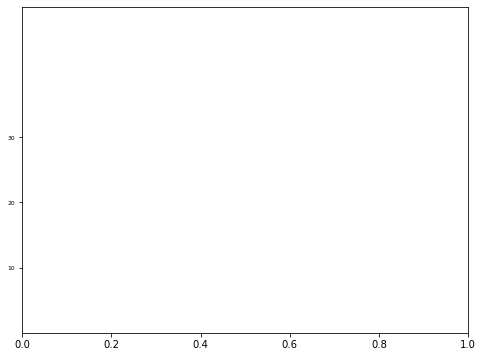

In [150]:
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="black", size=6)
plt.ylim(0,50)

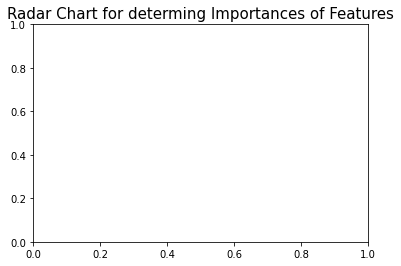

In [74]:
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
plt.title('Radar Chart for determing Importances of Features', fontsize = 15)

# Fill area
ax.fill(angles, values, 'blue', alpha=0.1)

In [78]:
'''
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

data['Sex'].value_counts()
'''

Data = pd.get_dummies(Data)

In [87]:
# splitting the dependent and independent variables

y = Data.iloc[:]

x = Data.iloc[:]

# getting the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (200, 6)
Shape of y: (200, 6)


In [88]:
# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (160, 6)
Shape of x_test : (40, 6)
Shape of y_train : (160, 6)
Shape of y_test : (40, 6)


In [89]:
# MODELLING
# RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score :", r2)

RMSE : 6.433311744350649
R2 Score : 0.9249318660528877


In [90]:
#for purmutation importance
!pip install eli5
import eli5 
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107735 sha256=c7dc270687d320ac6d1cf1ced4d93eeb4a6e3c3ec9fa12b29c5d3fb95d5a6175
  Stored in directory: c:\users\91779\appdata\local\pip\cache\wheels\85\ac\25\ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\91779\\anaconda3\\Lib\\site-packages\\~arkupsafe\\_speedups.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'eli5'